In [1]:
#importing Libraries
from keras.datasets import mnist #download the digit dataset
from keras.utils import to_categorical #
from keras.models import Sequential #arranging the layer in sequential order
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense #
import matplotlib.pyplot as plt #visualizing
import time

In [3]:
#Load Dataset
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

In [5]:
#Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

The original MNIST dataset images have the shape `(num_samples, height, width)`, which is `(60000, 28, 28)` for training data. The code above reshapes the data to `(num_samples, height, width, 1)` by adding a single channel dimension, converting each image to `(28, 28, 1)` to indicate grayscale. This 4D shape is required for convolutional neural networks, which expect input data with explicit channel information.

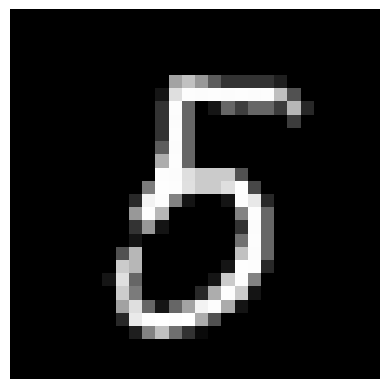

In [7]:
# Visuallize image
plt.axis('off')
plt.imshow(X_test[45],cmap='gray')
plt.show()

In [8]:
#Normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

Normalizing MNIST pixel values to a 0-1 range improves neural network training by **preventing instability from large input magnitudes**, enabling faster convergence through **balanced weight updates**, and **standardizing input ranges** for consistent processing. 

Dividing by 255 scales raw pixel values without centering or variance adjustments provides a foundational preprocessing step for efficient model training. This standardization ensures uniformity across datasets, aligning with common machine learning requirements for stable and reliable performance

In [9]:
#One hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

This code converts numerical labels (like 0-9 for MNIST digits) into binary vectors where the correct class is marked with 1 and others with 0. For example, a label "3" becomes `[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]`, enabling the neural network to process categorical data correctly using loss functions like categorical cross-entropy

In [10]:
#Neural Network
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu')) #FCL
model.add(Dense(10,activation='softmax')) #Output Layer

This code defines a Convolutional Neural Network (CNN) architecture for image classification, starting with **feature extraction via convolutional and pooling layers followed by fully connected layers for decision-making.** The final softmax layer outputs class probabilities, enabling the model to predict digit categories (0-9) from MNIST's 28x28 grayscale images.

In [18]:
#Compile Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

This line configures the model for training by specifying the **loss function (`categorical_crossentropy`), optimization algorithm (`adam`), and evaluation metric (`accuracy`).**


In [19]:
startTime = time.time()

In [13]:
#Train the Model
history=model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=10,batch_size=32)
stopTime = time.time()
diff = stopTime-startTime
print(diff)

Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 0.1534 - acc: 0.9546 - val_loss: 0.0786 - val_acc: 0.9754
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0543 - acc: 0.9837 - val_loss: 0.0511 - val_acc: 0.9838
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0331 - acc: 0.9901 - val_loss: 0.0447 - val_acc: 0.9850
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0516 - val_acc: 0.9844
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0150 - acc: 0.9949 - val_loss: 0.0450 - val_acc: 0.9873
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - acc: 0.9961 - val_loss: 0.0547 - val_acc: 0.9857
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0077 - acc: 0.9976 - val_loss: 0.0545 - val_acc: 0.9844
Epoch 8/10
1875/1875 [==============================] - 7s 4

This model achieves excellent **training accuracy (99.88%) but shows signs of overfitting**, as validation accuracy plateaus near 98.6% while training loss keeps decreasing.

In [14]:
#Evaluate the Model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.0609 - acc: 0.9860
Accuracy: 98.60


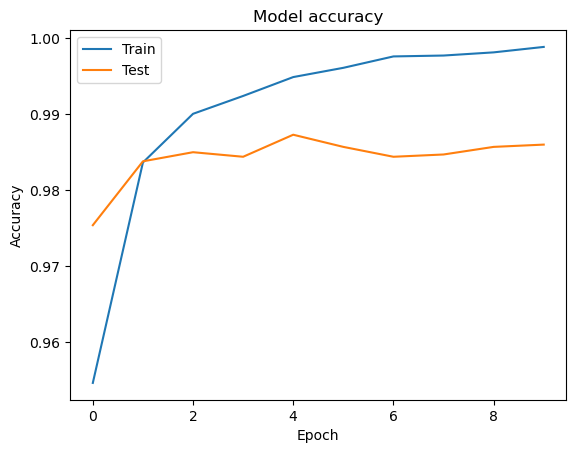

In [15]:
#Graphical Representation of Accuracy & Loss Graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

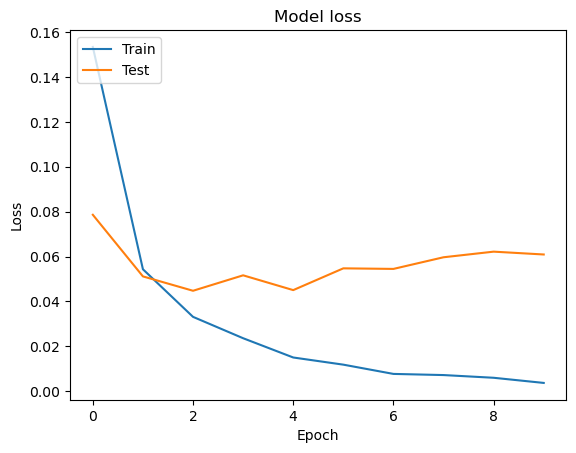

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The growing gap between training/validation loss (0.0037 vs. 0.0609) suggests the model memorizes training data nuances rather than generalizing fully to new examples.  

**Next steps, we can**:  
- Add regularization (e.g., dropout layers)  
- Use early stopping to halt training when validation loss stops improving  
- Consider data augmentation to improve generalization

In [17]:
#Save Model
model_json = model.to_json()
with open("model.json2", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h52")
print("Saved model to disk")

Saved model to disk
